# Try GAN with uniform distribtuion

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

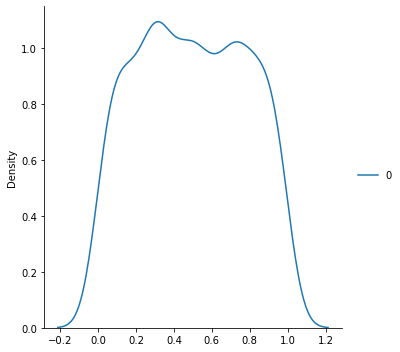

In [16]:
# True data distribution
b = 1
a = 0
POINTS = 1000
np.random.seed(3)
X = np.random.uniform(1,0,size = (POINTS,1))
sns.displot(X,kind='kde')
plt.show()

In [11]:
z_dim = 100

In [8]:
# Build Generator
# Take the z_dim as input
NODES = 10
def build_generator(z_dim):
    model = Sequential()
    # A fully connected layer
    model.add(Dense(NODES, input_dim=z_dim, activation='relu')) 
    # Output with tanh activation
    model.add(Dense(1, activation='tanh'))
    return model
# Build Discriminator
def build_discriminator():
    model = Sequential()
    # A fully connected layer
    model.add(Dense(NODES, activation = 'relu', input_dim = 1))
    # Output is the probabitly
    model.add(Dense(1, activation='sigmoid'))
    return model

In [10]:
# Build model

def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Build and complie the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])
# Built generator
generator = build_generator(z_dim)
# Keeps Discriminator’s parameters constant for Generator training
discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [26]:
# Output sample images
def sample_images(generator):
    # Sample random noise
    z = np.random.normal(0, 8, size = (100,z_dim))
    # Generate Images from random noise
    gen_samples = generator.predict(z)
    sns.displot(gen_samples, kind='kde')

In [25]:
# Train GAN model
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):
    # Rescale to [-1,1]
    X_train = X.copy()
    #X_train = X_train / 127.5 - 1.0
    #X_train = np.expand_dims(X_train, axis=3)
    # Label for real and face data
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    
    # Number of epochs
    for iteration in range(iterations):
        
        # 1. Train the Discriminator
        # ----
        # 1.a. Get a random batch of real images: x
        idx = np.random.randint(0, POINTS, batch_size)
        real_samples = X_train[idx]
        
        # 1.b.Generates a batch of fake images G(z)=x*
        z = np.random.normal(0, 8, (batch_size, 100))
        gen_samples = generator.predict(z)
        #print(gen_samples.shape)
        # 1.c Compute the classification losses for D(x) and D(x*)
        d_loss_real = discriminator.train_on_batch(real_samples, real)
        d_loss_fake = discriminator.train_on_batch(gen_samples, fake)
        # take the average of losses of real and fake training
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        
        # 2. Train the generator
        # ----
        # 2.a Generate a batch of fake image G(z) = x*
        # from random noise vector z
        z = np.random.normal(0, 8, (batch_size, 100))
        gen_samples = generator.predict(z)
        
        # 2.b Train the generator
        g_loss = gan.train_on_batch(z, real) # Why z
        
        # Save the losses and accs to plot them after training
        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
            (iteration + 1, d_loss, 100.0 * accuracy, g_loss))
            # Output a sample of generated Images
            sample_images(generator)

1000 [D loss: 0.692484, acc.: 47.66%] [G loss: 0.688219]
2000 [D loss: 0.691339, acc.: 50.00%] [G loss: 0.705595]
3000 [D loss: 0.691246, acc.: 50.00%] [G loss: 0.708900]
4000 [D loss: 0.694514, acc.: 50.00%] [G loss: 0.682760]
5000 [D loss: 0.694308, acc.: 50.00%] [G loss: 0.707882]


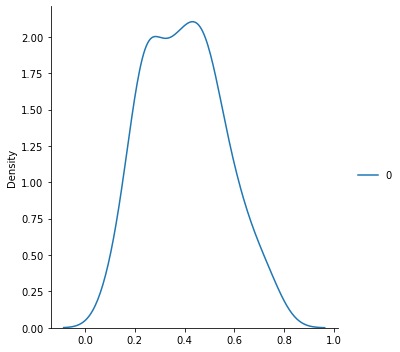

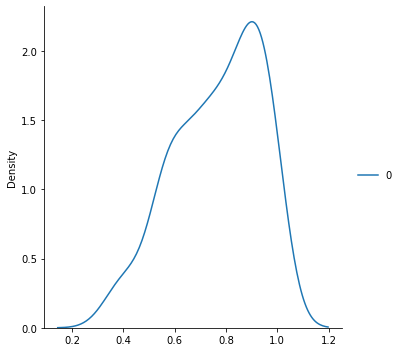

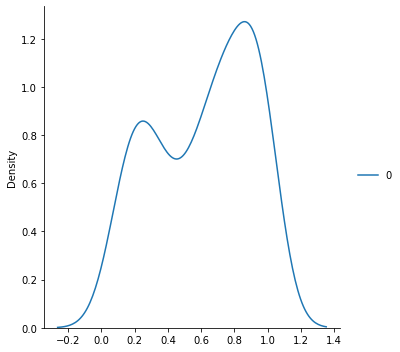

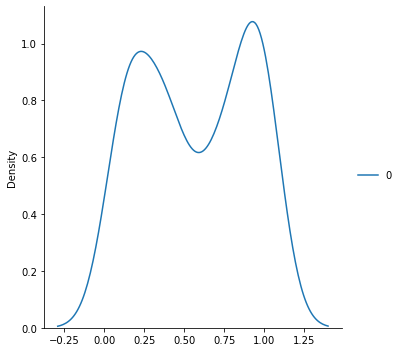

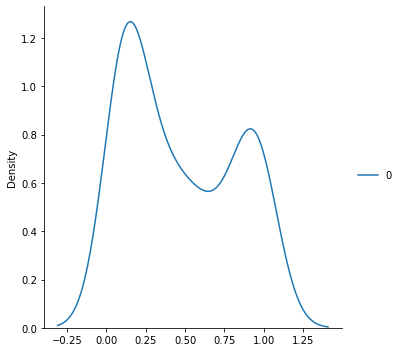

In [27]:
# Running the model
iterations = 5000
batch_size = 128
sample_interval = 1000
train(iterations, batch_size, sample_interval)